# Analysing the data.

## Genre with the most nominations:

In [1]:
import pandas as pd

In [2]:
movies_oscars = pd.read_csv('../results/movies_oscars.csv')

In [3]:
movies_oscars.groupby("genre")["nominations"].sum().sort_values(ascending=False)

genre
drama     52
action    32
comedy    32
horror    21
Name: nominations, dtype: int64

### The genre with the most nominations is drama.

In [4]:
movies_oscars = movies_oscars.groupby(["title", "genre"])["nominations"].sum()

In [5]:
movies_oscars = movies_oscars.reset_index()
movies_oscars

,title,genre,nominations
0,28 Days Later,horror,1
1,American Beauty,comedy,3
2,American Beauty,drama,3
3,American Psycho,horror,2
4,As Good As It Gets,comedy,5
5,As Good As It Gets,drama,5
6,Batman,action,4
7,Batman Begins,action,4
8,Big Fish,drama,2
9,Bram Stoker's Dracula,horror,3


## Mean of nominations by genre.

In [6]:
movies_oscars.groupby("genre")["nominations"].mean()

genre
action    2.461538
comedy    2.000000
drama     2.736842
horror    1.750000
Name: nominations, dtype: float64

## Nomination ratio by movie.

In [7]:
movies_oscars["ratio_nominations"] = movies_oscars.groupby("genre")["nominations"].transform(lambda x: x/x.mean())
movies_oscars

,title,genre,nominations,ratio_nominations
0,28 Days Later,horror,1,0.571429
1,American Beauty,comedy,3,1.500000
2,American Beauty,drama,3,1.096154
3,American Psycho,horror,2,1.142857
4,As Good As It Gets,comedy,5,2.500000
5,As Good As It Gets,drama,5,1.826923
6,Batman,action,4,1.625000
7,Batman Begins,action,4,1.625000
8,Big Fish,drama,2,0.730769
9,Bram Stoker's Dracula,horror,3,1.714286


### Ratio by nominations.

In [8]:
movies_oscars.nlargest(3, columns="ratio_nominations")

,title,genre,nominations,ratio_nominations
4,As Good As It Gets,comedy,5,2.500000
49,The Silence of the Lambs,horror,4,2.285714
39,The Dark Knight,action,5,2.031250


In [9]:
movies = pd.read_csv('../results/movies.csv')

In [10]:
movies[movies['title']=='As Good As It Gets']

,title,year,genre,actors
46,As Good As It Gets,1997,comedy,"Jack Nicholson,, Helen Hunt,, Greg Kinnear,, C..."
82,As Good As It Gets,1997,drama,"Jack Nicholson,, Helen Hunt,, Greg Kinnear,, C..."


### Movie with the greatest percentage difference compared to the average for its genre is As Good as it Gets (1997).

In [11]:
movies_oscars.nsmallest(3, columns="ratio_nominations")

,title,genre,nominations,ratio_nominations
25,Life Is Beautiful,drama,1,0.365385
35,Schindler's List,drama,1,0.365385
44,The Lion King,drama,1,0.365385


# Top Performers

In [13]:
movies_oscars = pd.read_csv('../results/movies_oscars.csv')

In [14]:
top_performers = movies_oscars.groupby('name')['nominations'].sum().reset_index()

top_performers = top_performers.sort_values(by='nominations', ascending=False)

top_performers = top_performers.head(10)

print(top_performers)

                 name  nominations
21     Jack Nicholson           18
52          Tom Hanks           10
5           Brad Pitt            7
41      Michael Caine            6
8     Christoph Waltz            4
7      Christian Bale            4
3     Anthony Hopkins            4
38  Leonardo DiCaprio            4
36       Kevin Spacey            4
47        Sally Field            4


# Movie with the most nominations.

In [24]:
movie_nominations = movies_oscars.groupby('title')['nominations'].sum().reset_index()

movie_nominations = movie_nominations.sort_values(by='nominations', ascending=False)

top_movie = movie_nominations.head(3)

print(top_movie)

                 title  nominations
3   As Good As It Gets           10
31     The Dark Knight           10
9         Forrest Gump            8


# How nominations have changed over the years.

In [16]:
nominations_by_genre = movies_oscars.groupby(['year', 'genre'])['nominations'].sum().reset_index()

print(nominations_by_genre)

    year   genre  nominations
0   1980  horror            3
1   1984  action            1
2   1989  action            5
3   1990  comedy            2
4   1991  horror            4
5   1992  horror            3
6   1993   drama            1
7   1994  comedy            5
8   1994   drama            7
9   1994  horror            1
10  1995  comedy            2
11  1996  horror            1
12  1997  action            2
13  1997  comedy            8
14  1997   drama            9
15  1998  comedy            2
16  1999  comedy            5
17  1999   drama            5
18  2000  action            4
19  2000  comedy            1
20  2000   drama            5
21  2000  horror            2
22  2001   drama            2
23  2001  horror            1
24  2002   drama            1
25  2002  horror            1
26  2003  action            1
27  2003  comedy            1
28  2003   drama            6
29  2004   drama            3
30  2005  action            5
31  2005  horror            1
32  2006  

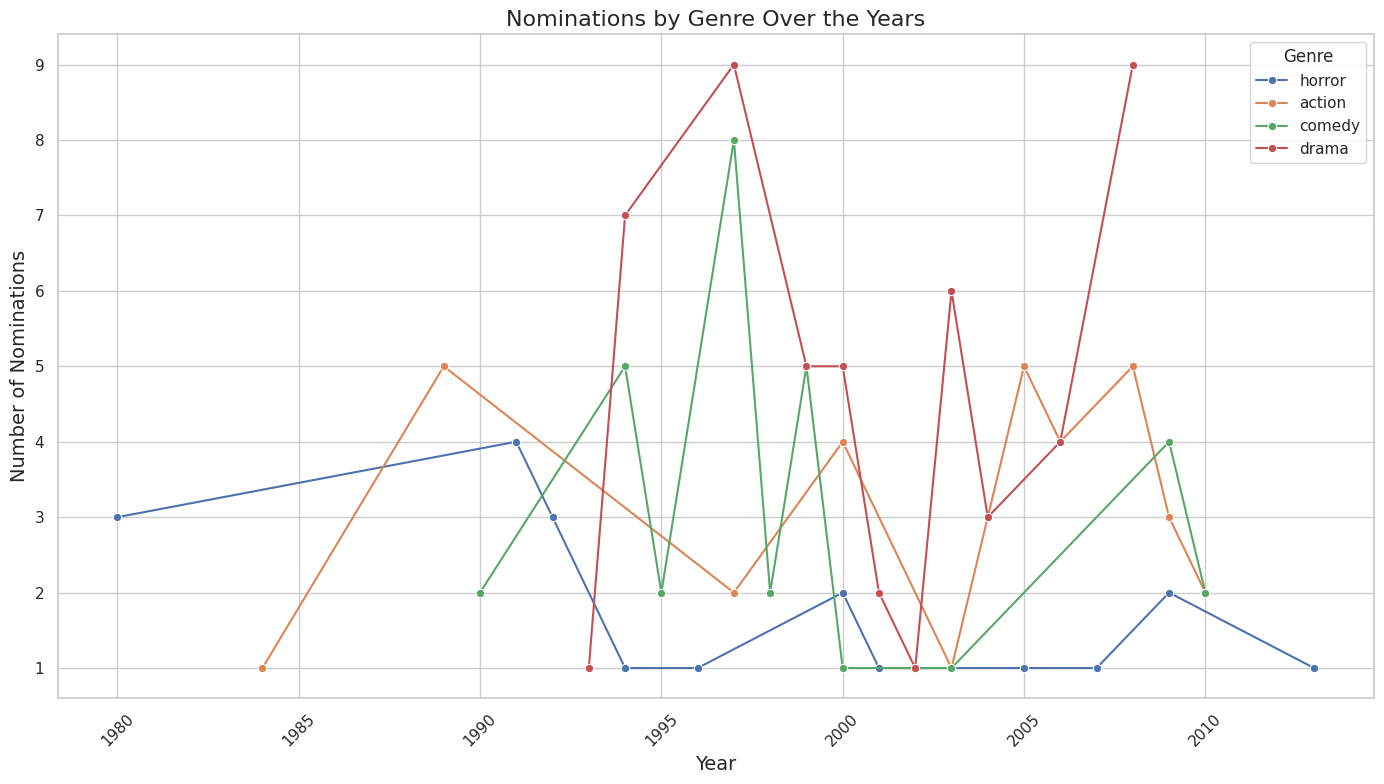

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

plt.figure(figsize=(14, 8))
sns.lineplot(data=nominations_by_genre, x='year', y='nominations', hue='genre', marker='o')

plt.title('Nominations by Genre Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Nominations', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()


# Prediction to know how the nominations by genre will be for the next 5 years.

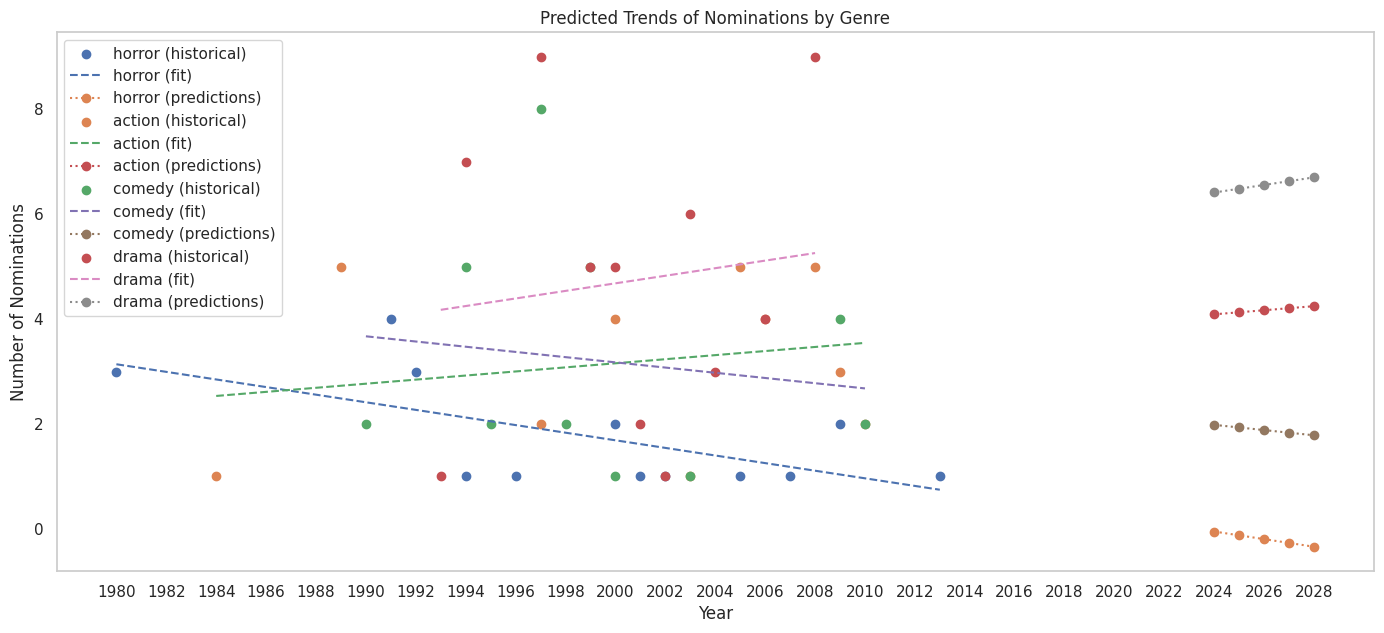

In [25]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load your nominations_by_genre DataFrame
# nominations_by_genre = pd.read_csv('path_to_your_csv')  # Uncomment and set the correct path if needed

# Define the future years you want to predict
future_years = pd.DataFrame({'year': range(2024, 2029)})  # Predicting for the next 5 years

# Creating a plot for visualizing predictions
plt.figure(figsize=(17, 7))

for genre in nominations_by_genre['genre'].unique():
    genre_data = nominations_by_genre[nominations_by_genre['genre'] == genre]

    # Fit the linear regression model
    X = genre_data['year']
    y = genre_data['nominations']
    X = sm.add_constant(X)  # Add a constant term for the intercept

    model = sm.OLS(y, X).fit()

    # Plot original nominations data
    plt.scatter(genre_data['year'], genre_data['nominations'], label=f'{genre} (historical)')

    # Plot the regression line
    plt.plot(genre_data['year'], model.predict(X), linestyle='--', label=f'{genre} (fit)')

    # Predict for future years
    future_X = sm.add_constant(future_years)
    future_predictions = model.predict(future_X)

    # Plot future predictions
    plt.plot(future_years['year'], future_predictions, marker='o', linestyle=':', label=f'{genre} (predictions)')

# Customize the plot
plt.title('Predicted Trends of Nominations by Genre')
plt.xlabel('Year')
plt.ylabel('Number of Nominations')
plt.xticks(range(1980, 2030, 2))  # Set x-ticks from 1980 to 2030
plt.legend()
plt.grid()
plt.show()
